In [109]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [110]:
df=pd.read_csv("BreadBasket_DMS.csv")
df.head(20)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [111]:
df.shape

(21293, 4)

In [112]:
#attribute in pandas that is used to get the data types of each column in a DataFrame. 
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [113]:
df.describe()
#gives the summary of the data

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [114]:
#data cleaning part
df.dropna(axis=0, subset=["Transaction"],inplace=True)
df["Item"]=df["Item"].str.strip()

In [115]:
df.shape

(21293, 4)

In [116]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [117]:
df.isnull().sum().sort_values(ascending=False)
#for checking if any null values are present or not

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [118]:
#type conversion this line converts the 'Date' column in the DataFrame df to a datetime format using the pd.to_datetime function. 
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [119]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [120]:
unique_values = df['Item'].unique()
#print(unique_values)
value_counts = df.groupby(['Item']).size().reset_index(name='frequency')
value_counts_sorted = value_counts.sort_values(by='frequency', ascending=False).head(10)
print(value_counts_sorted)

             Item  frequency
23         Coffee       5471
11          Bread       3325
84            Tea       1435
15           Cake       1025
66         Pastry        856
62           NONE        786
74       Sandwich        771
55      Medialuna        616
48  Hot chocolate        590
26        Cookies        540


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

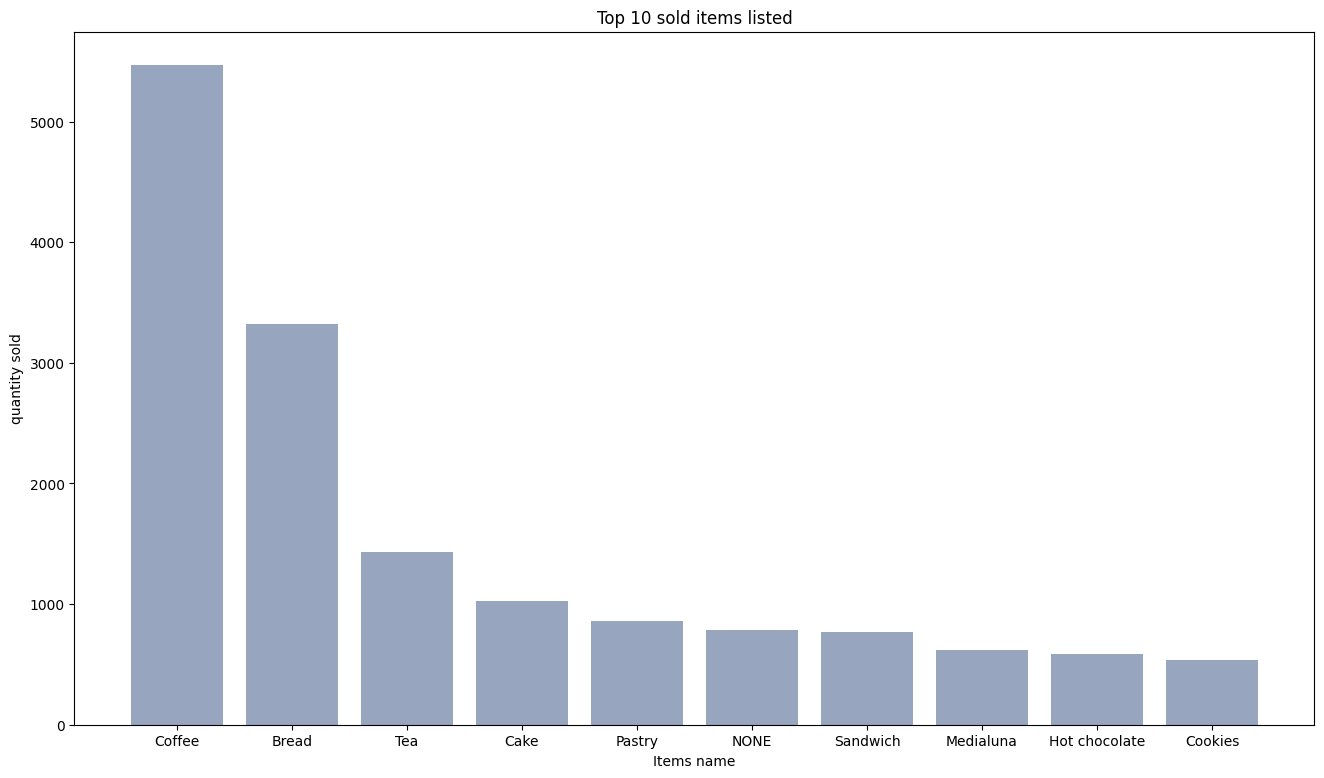

In [122]:
bars=value_counts_sorted["Item"]
height=value_counts_sorted["frequency"]
x=np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x,height,color=(0.2,0.3,0.5,0.5))
plt.title("Top 10 sold items listed")
plt.xlabel("Items name")
plt.ylabel("quantity sold")

plt.xticks(x,bars)
plt.show()

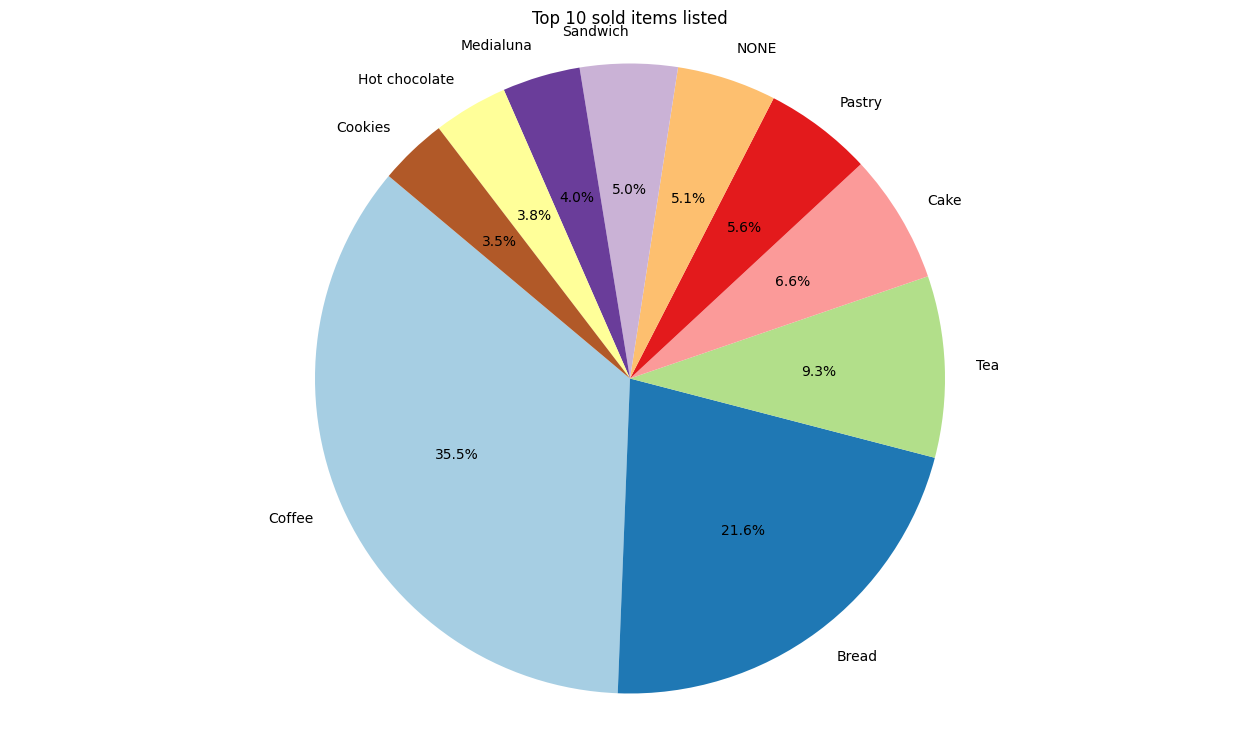

In [123]:
bars = value_counts_sorted["Item"]
height = value_counts_sorted["frequency"]

plt.figure(figsize=(16,9))
plt.pie(height, labels=bars, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.linspace(0, 1, len(bars))))
plt.title("Top 10 sold items listed")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

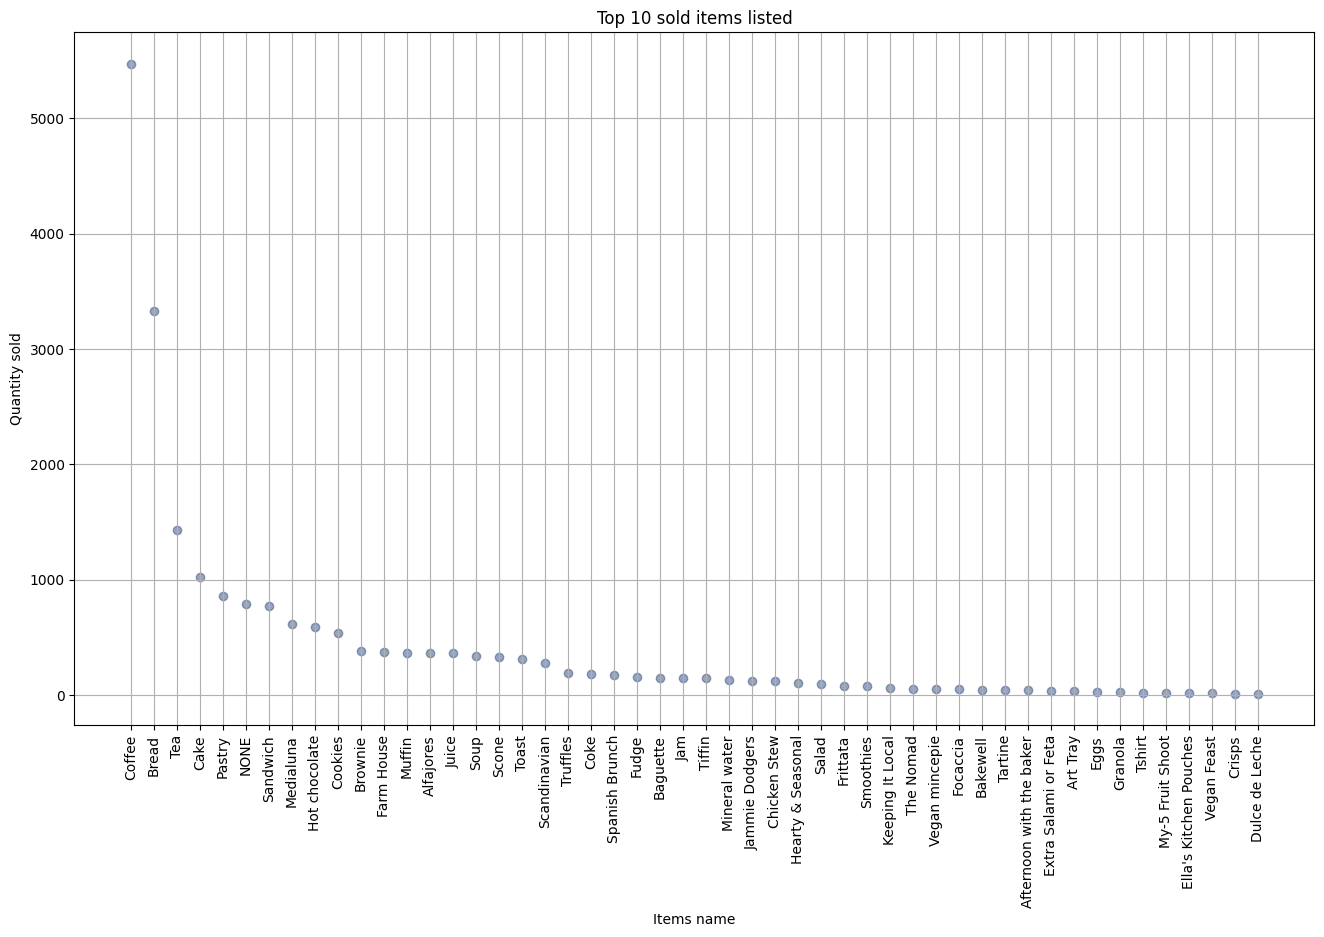

In [126]:
unique_values = df['Item'].unique()
#print(unique_values)
value_counts = df.groupby(['Item']).size().reset_index(name='frequency')
value_counts_sorted = value_counts.sort_values(by='frequency', ascending=False).head(50)
#print(value_counts_sorted)

bars = value_counts_sorted["Item"]
height = value_counts_sorted["frequency"]
x = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.scatter(x, height, color=(0.2, 0.3, 0.5, 0.5))
plt.title("Top 10 sold items listed")
plt.xlabel("Items name")
plt.ylabel("Quantity sold")

plt.xticks(x, bars, rotation=90)  # Rotate the labels for better readability
plt.grid(True)  # Add grid lines for better readability

plt.show()

In [17]:
df_date=df.set_index(["Date"])
df_date

,Time,Transaction,Item
Date,,,
2016-10-30,09:58:11,1,Bread
2016-10-30,10:05:34,2,Scandinavian
2016-10-30,10:05:34,2,Scandinavian
2016-10-30,10:07:57,3,Hot chocolate
2016-10-30,10:07:57,3,Jam
...,...,...,...
2017-04-09,14:32:58,9682,Coffee
2017-04-09,14:32:58,9682,Tea
2017-04-09,14:57:06,9683,Coffee


C:\Users\Pratik\AppData\Local\Temp\ipykernel_17640\2009773568.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date.resample("M")["Item"].count().plot(figsize=(20,8), grid=True, title="no of item sold in a month").set(xlabel="date",ylabel="no of item sold")


[Text(0.5, 0, 'date'), Text(0, 0.5, 'no of item sold')]

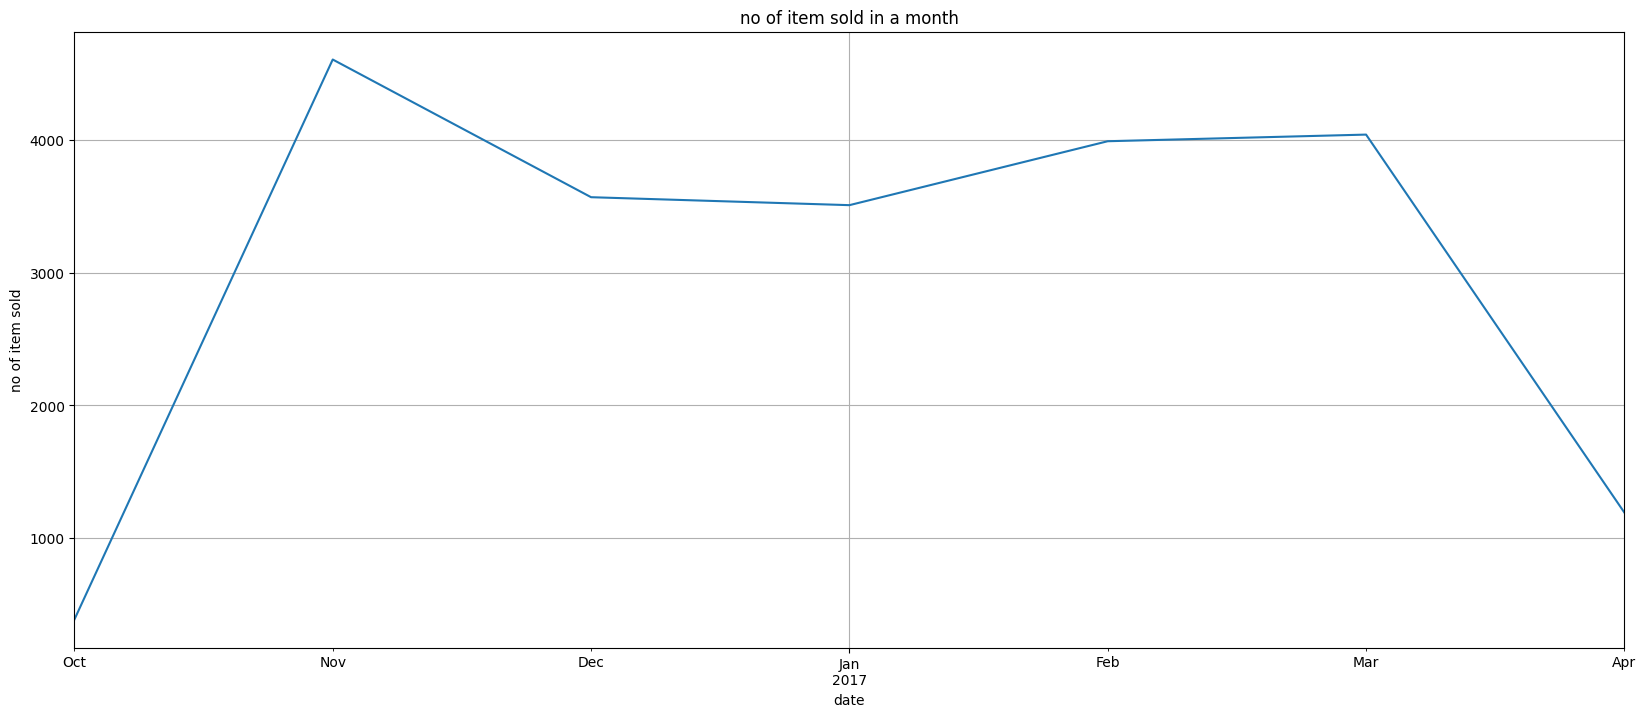

In [18]:
df_date.resample("M")["Item"].count().plot(figsize=(20,8), grid=True, title="no of item sold in a month").set(xlabel="date",ylabel="no of item sold")

[Text(0.5, 0, 'date'), Text(0, 0.5, 'no of item sold')]

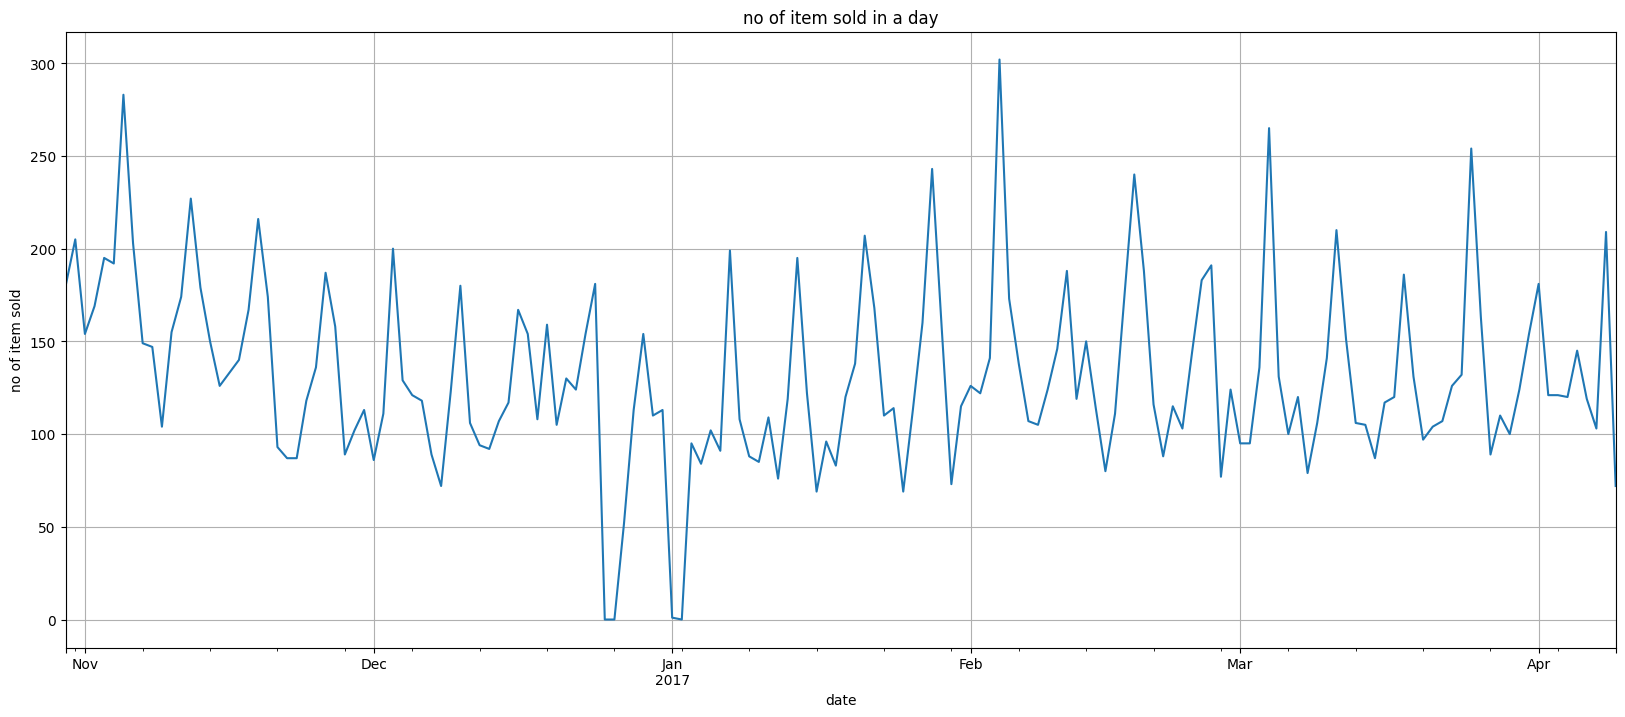

In [101]:
df_date.resample("D")["Item"].count().plot(figsize=(20,8), grid=True, title="no of item sold in a day").set(xlabel="date",ylabel="no of item sold")

In [39]:
df["year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df.sample(10)

,Date,Time,Transaction,Item,WeekDay,year,Month,Day
6416,2016-12-12,15:53:25,3065,Bread,Monday,2016,12,12
2488,2016-11-12,14:48:20,1177,Hearty & Seasonal,Saturday,2016,11,12
20621,2017-04-04,15:32:39,9385,Coffee,Tuesday,2017,4,4
9163,2017-01-08,12:19:31,4376,Smoothies,Sunday,2017,1,8
1105,2016-11-05,08:36:10,526,NONE,Saturday,2016,11,5
10021,2017-01-15,15:58:59,4766,Cake,Sunday,2017,1,15
9964,2017-01-15,13:12:20,4748,Bread,Sunday,2017,1,15
4041,2016-11-23,12:24:12,1907,Medialuna,Wednesday,2016,11,23
2897,2016-11-15,11:04:23,1360,Bread,Tuesday,2016,11,15
8342,2016-12-30,10:14:27,3984,Bread,Friday,2016,12,30


In [42]:
uniq = df['year'].unique()
value_counts = df.groupby(['year']).size().reset_index(name='frequency')
value_counts_sorted = value_counts.sort_values(by='frequency', ascending=False).head(10)
print(value_counts_sorted)

   year  frequency
1  2017      12732
0  2016       8561


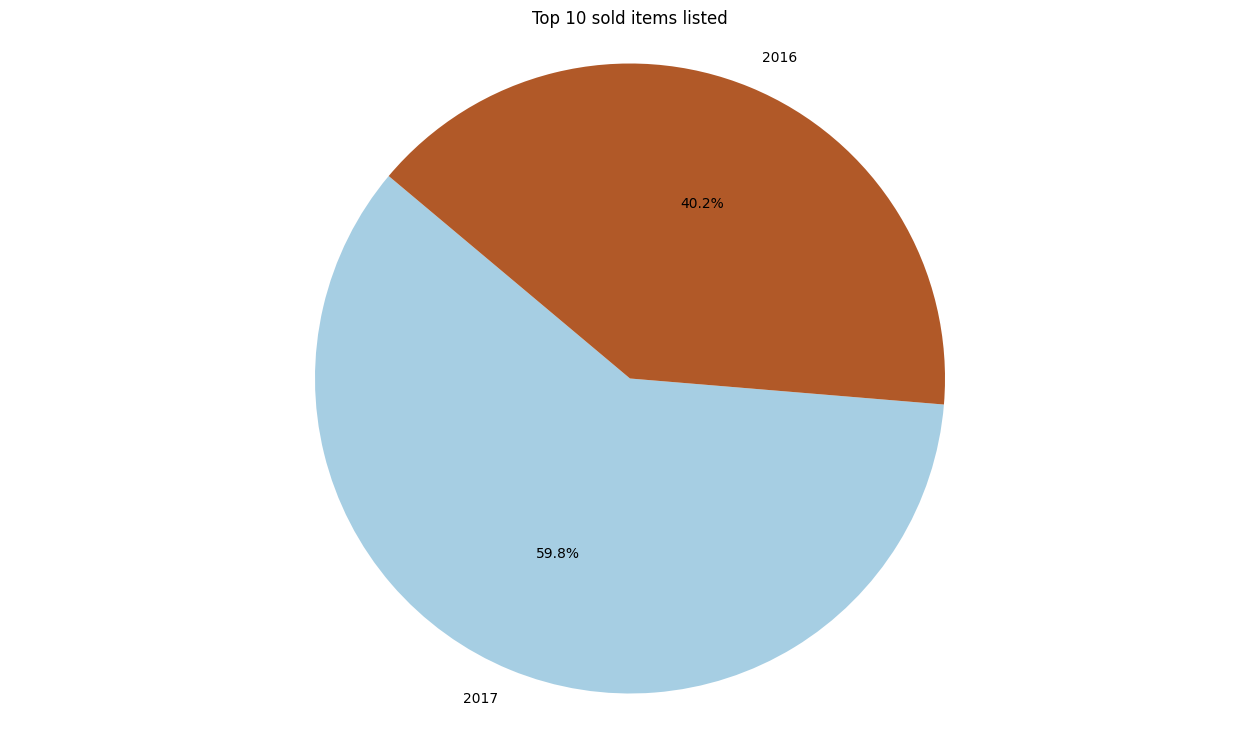

In [44]:
bars = value_counts_sorted["year"]
height = value_counts_sorted["frequency"]

plt.figure(figsize=(16,9))
plt.pie(height, labels=bars, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.linspace(0, 1, len(bars))))
plt.title("Top 10 sold items listed")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [49]:
uniq = df['Month'].unique()
value_count = df.groupby(['Month']).size().reset_index(name='frequency')
value_counts_sorted = value_count.sort_values(by='frequency', ascending=False).head(10)
print(value_counts_sorted)

   Month  frequency
5     11       4607
2      3       4041
1      2       3991
6     12       3569
0      1       3509
3      4       1191
4     10        385


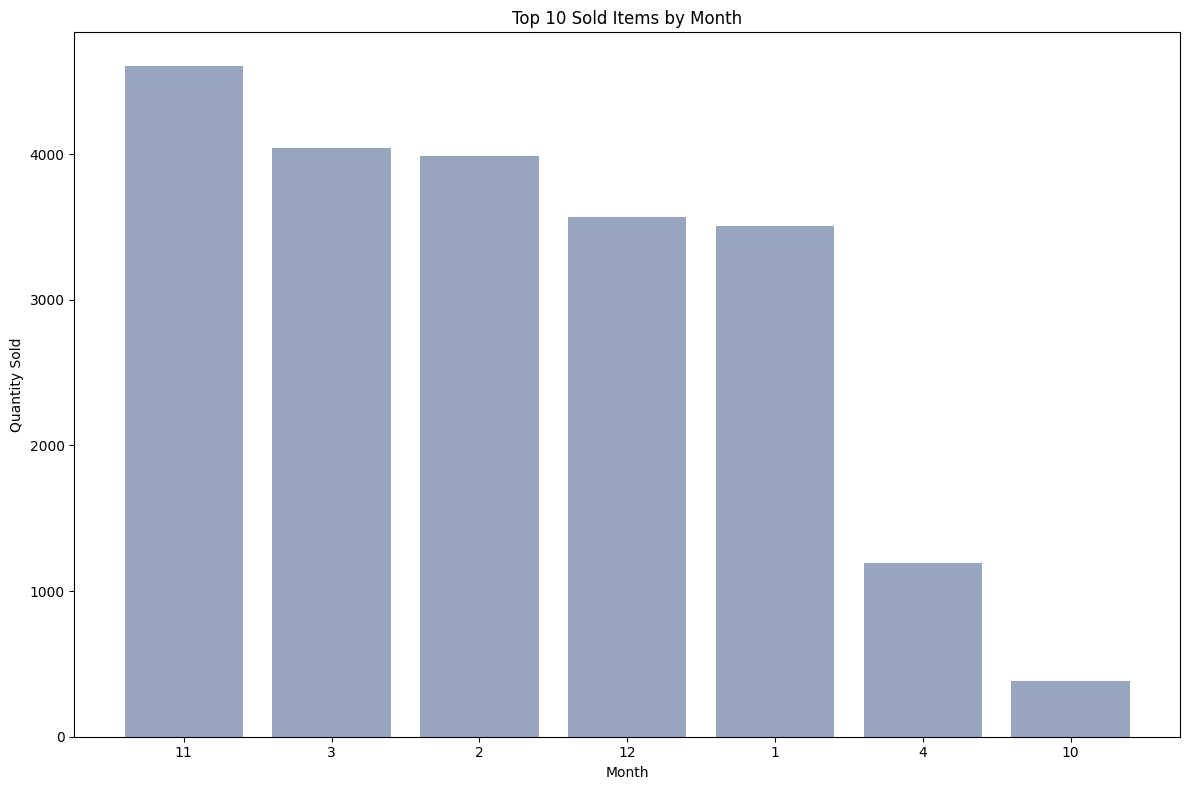

In [52]:
bars = value_counts_sorted["Month"].tolist()  # Assuming "Month" is a column with month names
heights = value_counts_sorted["frequency"].tolist()  # Assuming "frequency" is a column with corresponding frequencies

x = np.arange(len(bars))

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

plt.bar(x, heights, color=(0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 Sold Items by Month") 
plt.xlabel("Month") 
plt.ylabel("Quantity Sold") 

plt.xticks(x, bars) 

plt.tight_layout()  # Ensures the plot fits nicely in the figure area
plt.show()  # Display the plot

In [19]:
cust_level=df[["Transaction","Item"]].sort_values(by="Transaction",ascending=False)
cust_level["Item"]=cust_level["Item"].str.strip()
cust_level

,Transaction,Item
21292,9684,Smoothies
21291,9683,Pastry
21290,9683,Coffee
21288,9682,Coffee
21287,9682,Tacos/Fajita
...,...,...
4,3,Jam
3,3,Hot chocolate
2,2,Scandinavian
1,2,Scandinavian


In [85]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [104]:
def encode_units(x):
    return x >= 1

# Define apriori function
def apriori_function(d):
    # Grouping and encoding the transaction data
    encoding = d.groupby(["Transaction", "Item"])["Item"].count().unstack().fillna(0).applymap(encode_units)
    
    # Finding frequent itemsets
    freq = apriori(encoding, min_support=0.02, use_colnames=True)
    
    # Generating association rules
    r = association_rules(freq, metric="lift", min_threshold=1)
    
    # Sorting the rules by confidence
    sorted_rules = r.sort_values(by="confidence", ascending=False)
    
    return sorted_rules

# Apply apriori function to DataFrame
result = apriori_function(df)

# Convert result to DataFrame and display the first few rows
result_df = pd.DataFrame(result)
print(result_df.head(10))

C:\Users\Pratik\AppData\Local\Temp\ipykernel_17640\2041617620.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoding = d.groupby(["Transaction", "Item"])["Item"].count().unstack().fillna(0).applymap(encode_units)


        antecedents consequents  antecedent support  consequent support  \
20          (Toast)    (Coffee)            0.033365            0.475081   
13      (Medialuna)    (Coffee)            0.061379            0.475081   
17         (Pastry)    (Coffee)            0.085510            0.475081   
10          (Juice)    (Coffee)            0.038296            0.475081   
14           (NONE)    (Coffee)            0.079005            0.475081   
19       (Sandwich)    (Coffee)            0.071346            0.475081   
2            (Cake)    (Coffee)            0.103137            0.475081   
6         (Cookies)    (Coffee)            0.054034            0.475081   
8   (Hot chocolate)    (Coffee)            0.057916            0.475081   
1          (Pastry)     (Bread)            0.085510            0.324940   

     support  confidence      lift  leverage  conviction  zhangs_metric  
20  0.023502    0.704403  1.482699  0.007651    1.775789       0.336791  
13  0.034939    0.569231  

In [105]:
result_lift=result.sort_values(by="lift",ascending=False)
result_lift.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235,0.444078
4,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146,0.425012
20,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789,0.336791
21,(Coffee),(Toast),0.475081,0.033365,0.023502,0.049470,1.482699,0.007651,1.016943,0.620199
12,(Coffee),(Medialuna),0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129,0.315092
13,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
16,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402,0.265898
17,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
11,(Coffee),(Juice),0.475081,0.038296,0.020460,0.043065,1.124537,0.002266,1.004984,0.210976
10,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155


In [106]:
result_support=result.sort_values(by="support",ascending=False)
result_support.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717,0.187545
2,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
17,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
16,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402,0.265898
15,(Coffee),(NONE),0.475081,0.079005,0.042073,0.088560,1.120938,0.004539,1.010483,0.205536
14,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,0.117145
18,(Coffee),(Sandwich),0.475081,0.071346,0.037981,0.079947,1.120551,0.004086,1.009348,0.204950
19,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,0.115847
13,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
12,(Coffee),(Medialuna),0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129,0.315092
